# Heart Disease Analysis

## Libraries

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

## Data Exploration

In [78]:
# Importing the dataset
df = pd.read_csv("heart_2022_no_nans.csv")

# first few observations
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [79]:
# Double checking for NaNs
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [80]:
# Checking the format of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [81]:
# Checking the dimension of the dataset
df.shape

(246022, 40)

In [82]:
# Descriptive statistics
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


## Feature Selection

Creating a new column 'Heart Disease', which means people who have angina and/or heart attack.

In [83]:
# Creating a new column 'heart disease' which have either had angina or/and heart attack
df['HeartDisease'] = np.where((df['HadAngina'] == 'Yes') | (df['HadHeartAttack']=='Yes'), 1, 0)

# Comparing the new column with hadangina and hadheartattack column
df.loc[:,["HeartDisease", 'HadHeartAttack', 'HadAngina']].sample(10)

,HeartDisease,HadHeartAttack,HadAngina
232179,0,No,No
92110,1,Yes,Yes
17612,0,No,No
137717,0,No,No
199355,0,No,No
197428,0,No,No
39109,0,No,No
97696,1,Yes,No
189032,0,No,No
198526,0,No,No


## Distributions of numerical variables

In [84]:
# Correlation between the numerical data
df_num = df.select_dtypes(include=('number'))

# Checking the data
df_num.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease
0,4.0,0.0,9.0,1.60,71.67,27.99,0
1,0.0,0.0,6.0,1.78,95.25,30.13,0
2,0.0,0.0,8.0,1.85,108.86,31.66,0
3,5.0,0.0,9.0,1.70,90.72,31.32,0
4,3.0,15.0,5.0,1.55,79.38,33.07,0


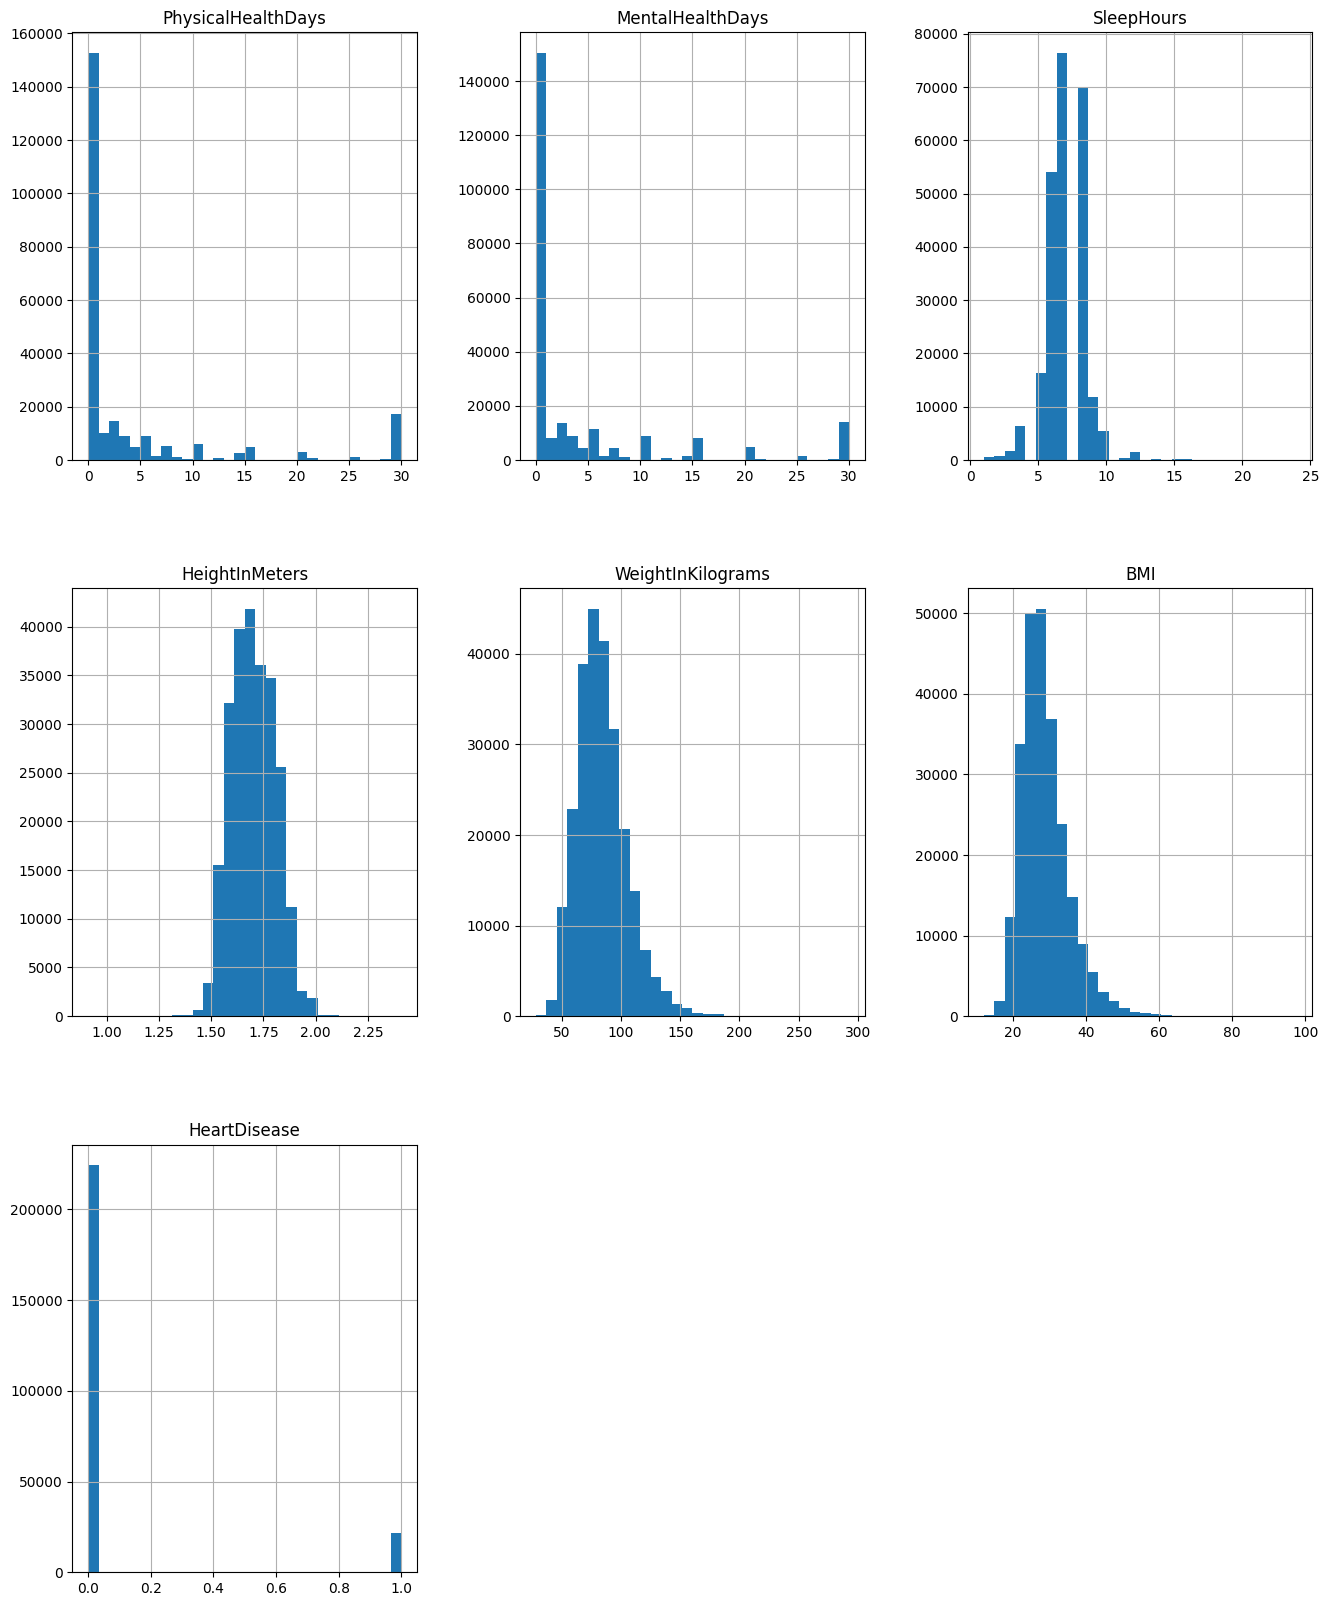

In [85]:
# Distributions of each numerical variable
df_num.hist(figsize=(16, 20), bins=30);

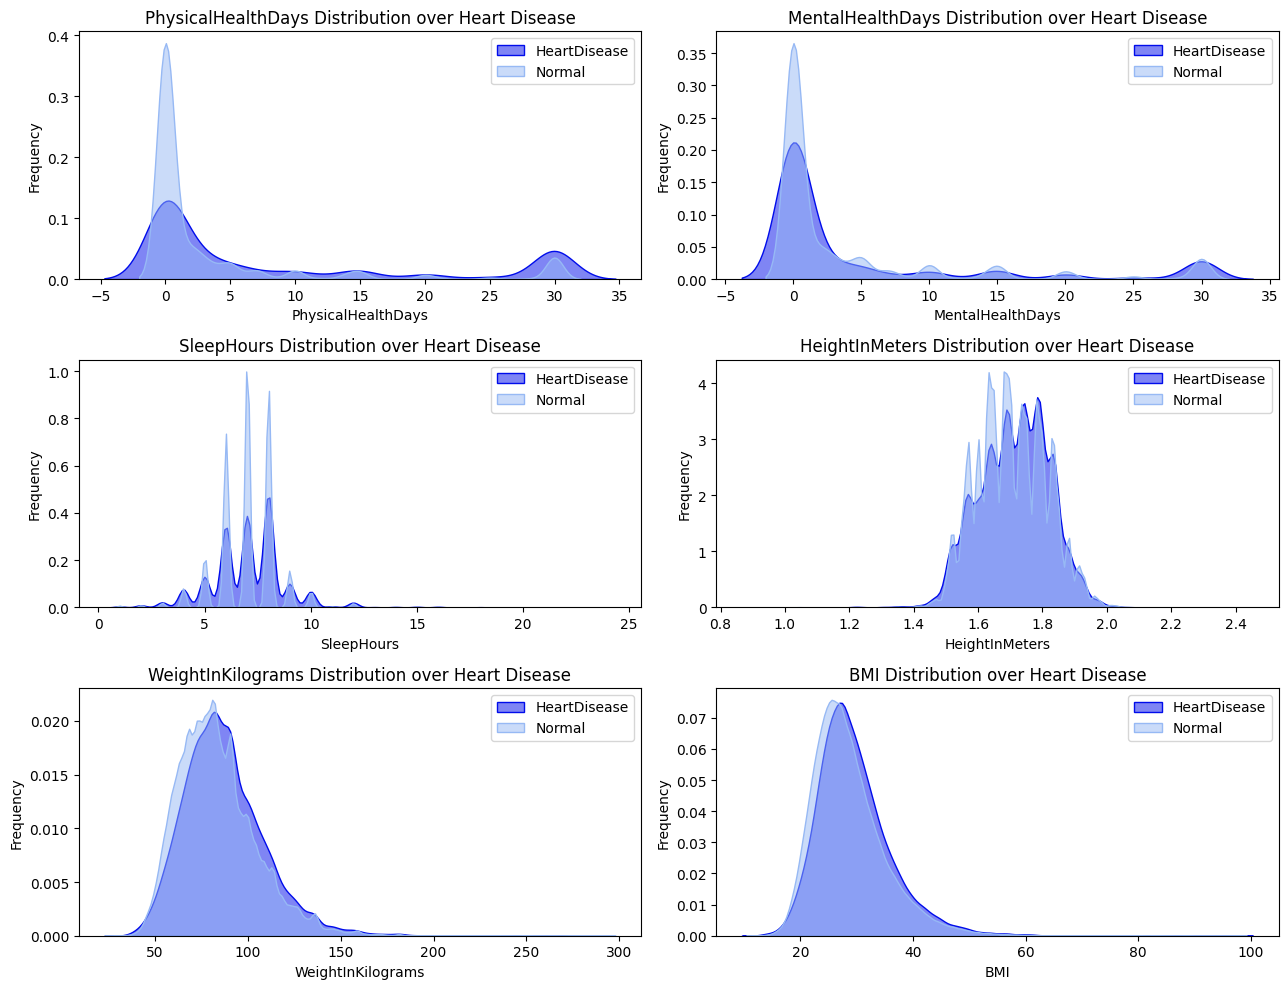

In [86]:
fig, axes = plt.subplots(nrows=len(df_num.columns) // 2, ncols=2, figsize=(13, 10))

for idx, column in enumerate(df_num.drop(columns = 'HeartDisease')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.kdeplot(df[df["HeartDisease"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="HeartDisease", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["HeartDisease"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Heart Disease")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

## Checking for outliers

<Axes: >

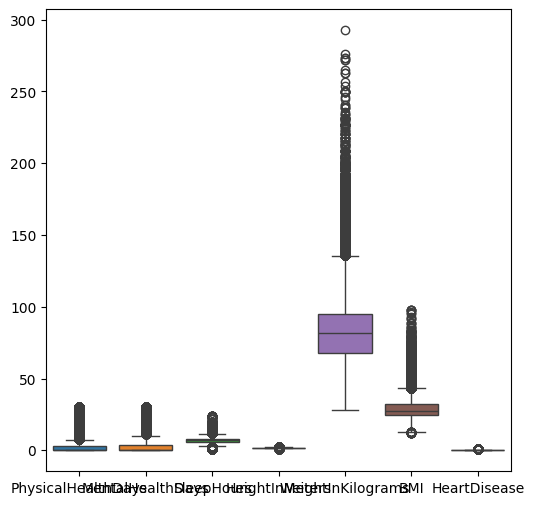

In [87]:
# creating boxplot visuals
plt.figure(figsize=(6,6))
sns.boxplot(data=df_num)

## Checking for colinearity

<Axes: >

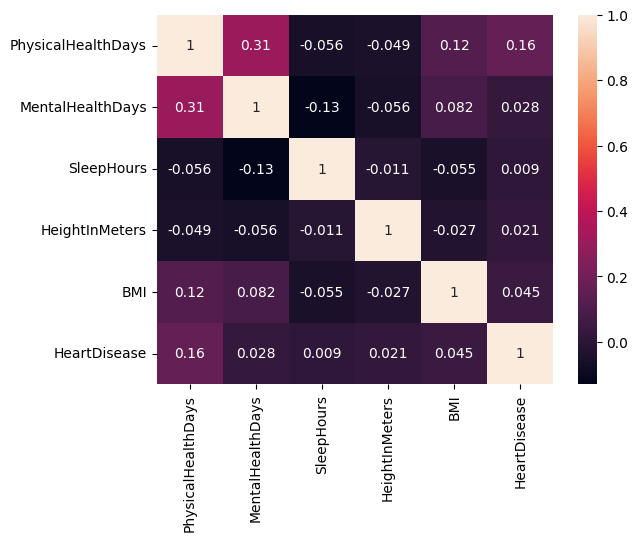

In [56]:
# Creating a heatmap to see the correlation between numeric variables
sns.heatmap(df_num.corr(), annot=True)

In [88]:
# Removing certain columns from the dataframe 
df.drop(['HadAngina', 'HadHeartAttack', 'State', 'WeightInKilograms'], inplace=True, axis=1)

## Exploring Categorical Variables

In [89]:
# Dimensions of the dataframe
df.shape

(246022, 37)

In [90]:
# Checking the levels of the categorical variables
df_cat = df.select_dtypes(include="object")

for col in df_cat.columns:

    print(f'\nVariable: {col}')
    print(df[col].unique())


Variable: Sex
['Female' 'Male']

Variable: GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Variable: LastCheckupTime
['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']

Variable: PhysicalActivities
['Yes' 'No']

Variable: RemovedTeeth
['None of them' '6 or more, but not all' '1 to 5' 'All']

Variable: HadStroke
['No' 'Yes']

Variable: HadAsthma
['No' 'Yes']

Variable: HadSkinCancer
['No' 'Yes']

Variable: HadCOPD
['No' 'Yes']

Variable: HadDepressiveDisorder
['No' 'Yes']

Variable: HadKidneyDisease
['No' 'Yes']

Variable: HadArthritis
['Yes' 'No']

Variable: HadDiabetes
['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']

Variable: DeafOrHardOfHearing
['No' 'Yes']

Variable: BlindOrVisionDifficulty
['No' 'Yes']

Variable: DifficultyConcentrating
['No' 'Yes']

Variable: DifficultyWalki

In [18]:
df_cat.describe()

,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022,...,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022
unique,2,5,4,2,4,2,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,127811,86999,198153,191318,131592,235910,209493,225001,227028,195402,...,141822,186336,28557,135307,161520,131196,146130,81747,235446,167306


In [19]:
for col in df_cat:
    print(f"Percentage distribution for {col}:")
    percentage = df[col].value_counts(normalize=True) * 100
    print(percentage.round(2).astype(str) + '%')
    print("\n")

Percentage distribution for Sex:
Sex
Female    51.95%
Male      48.05%
Name: proportion, dtype: object


Percentage distribution for GeneralHealth:
GeneralHealth
Very good    35.36%
Good         31.46%
Excellent    16.88%
Fair         12.46%
Poor          3.83%
Name: proportion, dtype: object


Percentage distribution for LastCheckupTime:
LastCheckupTime
Within past year (anytime less than 12 months ago)         80.54%
Within past 2 years (1 year but less than 2 years ago)      9.44%
Within past 5 years (2 years but less than 5 years ago)     5.59%
5 or more years ago                                         4.43%
Name: proportion, dtype: object


Percentage distribution for PhysicalActivities:
PhysicalActivities
Yes    77.76%
No     22.24%
Name: proportion, dtype: object


Percentage distribution for RemovedTeeth:
RemovedTeeth
None of them              53.49%
1 to 5                    30.36%
6 or more, but not all    10.55%
All                         5.6%
Name: proportion, dtype: obje

## Encoding and Simplifying the levels

In [92]:
# Encoding binary variables
binary_columns = df.columns[df.nunique() == 2]

# Creating a map
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

# Replacing the values
for col in binary_columns:
    df[col] = df[col].replace(binary_mapping)

C:\Users\hoybr\AppData\Local\Temp\ipykernel_19352\1673466253.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_mapping)


In [93]:
# Define the mapping dictionary
checkup_mapping = {
    'Within past year (anytime less than 12 months ago)': 0,
    'Within past 2 years (1 year but less than 2 years ago)': 1,
    'Within past 5 years (2 years but less than 5 years ago)': 2,
    '5 or more years ago': 3
}

# Apply the mapping using replace
df['LastCheckupTime'] = df['LastCheckupTime'].replace(checkup_mapping)

C:\Users\hoybr\AppData\Local\Temp\ipykernel_19352\3625689521.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LastCheckupTime'] = df['LastCheckupTime'].replace(checkup_mapping)


In [94]:
# Define the mapping dictionary
teeth_mapping = {
    'None of them': 0,
    '1 to 5': 1,
    '6 or more, but not all': 2,
    'All': 3
}

# Apply the mapping using replace
df['RemovedTeeth'] = df['RemovedTeeth'].replace(teeth_mapping)

C:\Users\hoybr\AppData\Local\Temp\ipykernel_19352\2102052620.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RemovedTeeth'] = df['RemovedTeeth'].replace(teeth_mapping)


In [95]:
# Simplifying the levels of smoker status
df['HadDiabetes'] = df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes':'Borderline (Pre-Diabetes)', 
                                                            'Yes, but only during pregnancy (female)': 'Yes, during pregnancy'})

In [96]:
# Simplifying the levels of smoker status
df['SmokerStatus'] = df['SmokerStatus'].replace({'Never smoked':'Never', 
                                                            'Former smoked': 'Previously',
                                                            'Current smoker - now smokes some days':'Sometimes',
                                                            'Current smoker - now smokes every day':'Everyday'})

In [98]:
# Simplifying the levels of e-cigarette
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace({'Never used e-cigarettes in my entire life':'Never', 
                                                            'Not at all (right now)': 'Recently',
                                                            'Use them some days':'Sometimes',
                                                            'Use them every day':'Everyday'})

In [99]:
# Simplifying the levels
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace({'No, did not receive any tetanus shot in the past 10 years':'No', 
                                                            'Yes, received tetanus shot but not sure what type': 'Yes, but not sure what type',
                                                            'Yes, received Tdap':'Yes',
                                                            'Yes, received tetanus shot, but not Tdap':'Yes, but not Tdap'})



In [100]:
# Mapping dictionary
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

# Apply the mapping using replace
df['GeneralHealth'] = df['GeneralHealth'].replace(general_health_mapping)

C:\Users\hoybr\AppData\Local\Temp\ipykernel_19352\3700796849.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GeneralHealth'] = df['GeneralHealth'].replace(general_health_mapping)


In [101]:
# Mapping dictionary
covid_mapping = {
    'Tested positive using home test without a health professional': "Tested (+) with home kit"
}

# Apply the mapping using replace
df['GeneralHealth'] = df['GeneralHealth'].replace(general_health_mapping)

In [103]:
# Mapping dictionary
age_mapping = {
    'Age 65 to 69': 9,
    'Age 60 to 64': 8,
    'Age 70 to 74': 10,
    'Age 55 to 59': 7,
    'Age 50 to 54': 6,
    'Age 75 to 79': 11,
    'Age 80 or older': 12,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 35 to 39': 3,
    'Age 30 to 34': 2,
    'Age 18 to 24': 0,
    'Age 25 to 29': 1
}

# Apply the mapping using replace
df['AgeCategory'] = df['AgeCategory'].replace(age_mapping)

In [104]:
df['AgeCategory'].value_counts()

AgeCategory
9     28557
8     26720
10    25739
7     22224
6     19913
11    18136
12    17816
4     16973
5     16753
3     15614
2     13346
0     13122
1     11109
Name: count, dtype: int64

In [105]:
# One-hot encoding the remaining categorical variables
categorical_col = df.select_dtypes(include="object").columns

for col in categorical_col:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

In [106]:
df.head(10)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,HadAsthma,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",TetanusLast10Tdap_No,TetanusLast10Tdap_Yes,"TetanusLast10Tdap_Yes, but not Tdap","TetanusLast10Tdap_Yes, but not sure what type",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,3,4.0,0.0,0,1,9.0,0,0,0,...,False,False,True,False,True,False,False,True,False,False
1,1,3,0.0,0.0,0,1,6.0,0,0,0,...,False,False,True,False,False,False,True,True,False,False
2,1,3,0.0,0.0,0,0,8.0,2,0,0,...,False,False,True,True,False,False,False,False,False,True
3,0,1,5.0,0.0,0,1,9.0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
4,0,2,3.0,15.0,0,1,5.0,1,0,0,...,False,False,True,True,False,False,False,True,False,False
5,1,2,0.0,0.0,0,1,7.0,0,0,0,...,False,False,True,False,False,False,True,True,False,False
6,0,2,3.0,0.0,0,1,8.0,2,1,0,...,False,False,False,True,False,False,False,True,False,False
7,1,1,5.0,0.0,0,1,8.0,1,0,0,...,False,False,True,True,False,False,False,False,False,True
8,1,2,2.0,0.0,3,0,6.0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
9,0,3,0.0,0.0,0,1,7.0,0,0,1,...,False,False,True,True,False,False,False,True,False,False


In [107]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'AgeCategory', 'HeightInMeters', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'HeartDisease',
       'HadDiabetes_Borderline (Pre-Diabetes)', 'HadDiabetes_No',
       'HadDiabetes_Yes', 'HadDiabetes_Yes, during pregnancy',
       'SmokerStatus_Everyday', 'SmokerStatus_Former smoker',
       'SmokerStatus_Never', 'SmokerStatus_Sometimes',
       'ECigaretteUsage_Everyday', 'ECigaretteUsage_Never',
       'ECigaretteUsage_Recently', 'ECigaretteUsage_Sometimes',
       'Race

## Checking the correlation between target and the other variables

<Axes: >

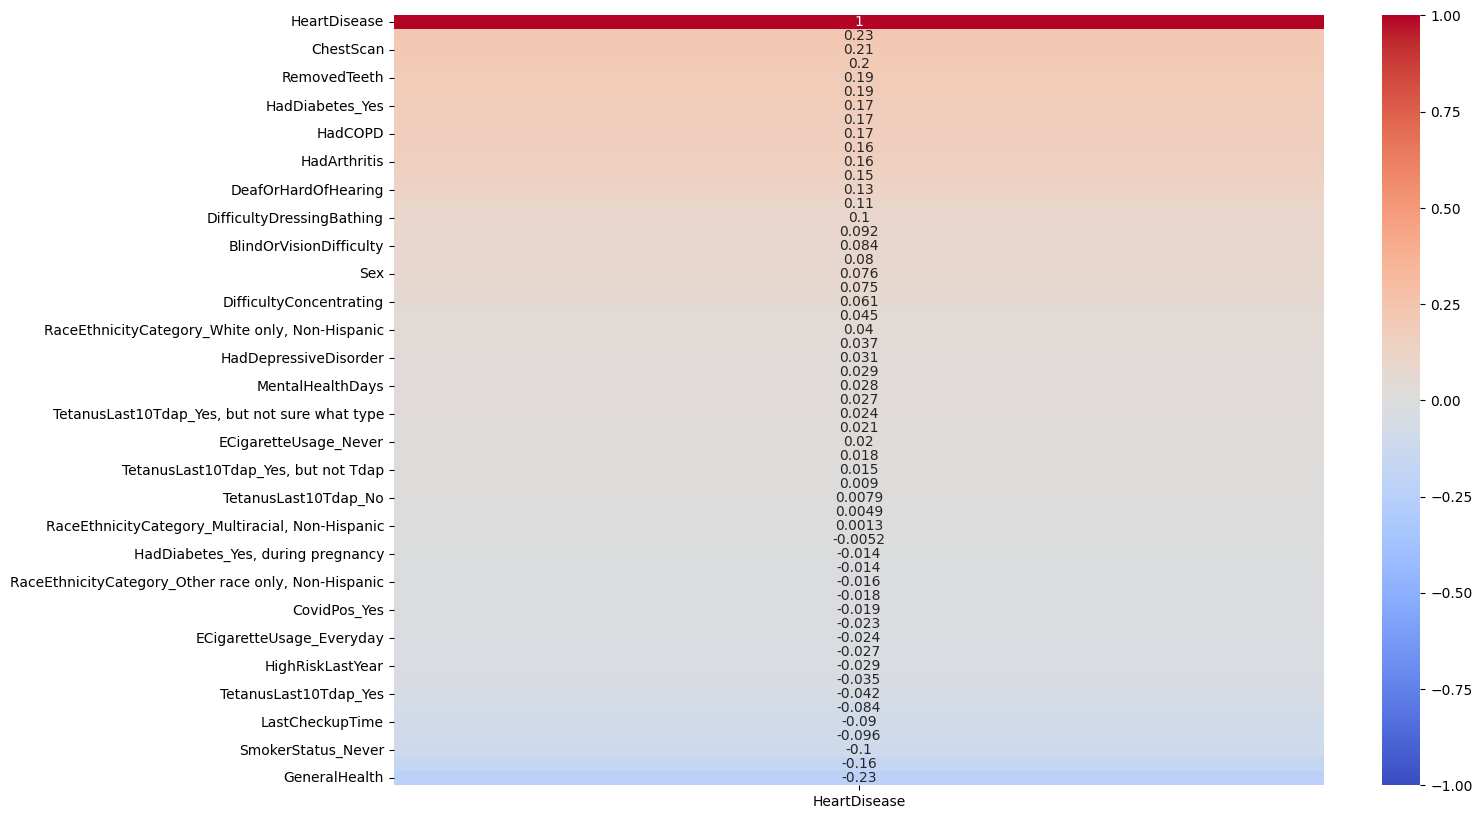

In [108]:
# Correlation between the variables and heart disease
df_corr = df.corr()['HeartDisease'].sort_values(ascending=False)

# Create a DataFrame for the heatmap
df_heatmap = pd.DataFrame(df_corr)

# Heatmap to illustrate the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

## Preprocessing

In [109]:
# Sampling equal numbers of data from each level of heart disease
heart_disease = df[df['HeartDisease']==1].sample(n=5000, random_state=42)
no_heart_disease = df[df['HeartDisease']==0].sample(n=5000, random_state=42)

# Combining the samples
balanced_sample = pd.concat([heart_disease, no_heart_disease])

# Shuffling the sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42)

In [110]:
# Splitting the data to X and y
X = balanced_sample.drop('HeartDisease', axis=1)
y = balanced_sample['HeartDisease']

## Scaling the data

In [111]:
# Initialising the min-max scaler
scaler = MinMaxScaler()

# Scaling the data
X_scaled = scaler.fit_transform(X)

# Converting to dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [112]:
# Splitting to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=42, train_size=0.7)

In [113]:
# Checking the dimensions of the training and testing sets
print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (7000, 54)
X test: (3000, 54)
y train: (7000,)
y test: (3000,)


## Machine learning development

In [114]:
# Initialising random forest and Ada booster
rf = RandomForestClassifier(n_estimators=1000,random_state=42, max_depth=11)

# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=1000, random_state=42)

In [115]:
# Making predictions
rf_pred = rf.predict(X_test)

# Accuracy score
rf_score = rf.score(X_test, y_test)

print(rf_score)

0.7676666666666667


In [116]:
# Confusion matrix of random forest
classes = df['HeartDisease'].unique()
rf_conf_mat = confusion_matrix(y_test, rf_pred)
rf_cm_df = pd.DataFrame(rf_conf_mat, columns=classes, index=classes)
rf_cm_df

,0,1
0,1043,418
1,279,1260


In [117]:
# average f1 score
rf_f1 = f1_score(y_test, rf_pred, average='micro')
print(rf_f1)

# f1 score per class
f = f1_score(y_test, rf_pred, average=None)
print(f'F1 Score (No): {f[0]}')
print(f'F1 Score (Yes): {f[1]}')

0.7676666666666667
F1 Score (No): 0.7495508444125045
F1 Score (Yes): 0.7833385141436121


In [47]:
print(f'Random Forest: {rf_score}')

Random Forest: 0.767


In [118]:
# Getting the importance
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_importance

AgeCategory                                                               0.151404
ChestScan                                                                 0.107487
GeneralHealth                                                             0.073396
BMI                                                                       0.046994
HadArthritis                                                              0.043341
PneumoVaxEver                                                             0.042372
HeightInMeters                                                            0.035818
RemovedTeeth                                                              0.035536
PhysicalHealthDays                                                        0.035296
DifficultyWalking                                                         0.032791
HadStroke                                                                 0.030477
HadDiabetes_Yes                                                           0.027625
Sex 

## Hyperparameter Tuning

In [197]:
# Tuning the Random Forest model using a loop

# List of estimators
n_est = [50, 100, 200, 300, 400, 500, 600, 1000]

# Creating an empty score list
score_list = []

# Using a loop to get the accuracy of the Random Forest Model with different depths and estimators
for i in n_est:
    for j in range(1, 12):
        rf = RandomForestClassifier(max_depth= j , n_estimators= i, random_state=42)

        # Fitting the model with the training set
        rf.fit(X_train, y_train)

        # Making predictions
        rf_pred = rf.predict(X_test)

        # f1 score per class
        f1_average = f1_score(y_test, rf_pred, average=None)
        f1_no = f1_average[0]
        f1_yes = f1_average[1]

        
        # Obtaining the accuracy scores of the models and adding it to the score list
        score = rf.score(X_test, y_test)
        score_list.append((i, j,score, f1_no, f1_yes))

In [200]:
# Create the DataFrame
df_scores = pd.DataFrame(score_list, columns=['n_estimators', 'max_depth', 'accuracy', 'f1_no', 'f1_yes'])

# Sort the DataFrame by accuracy in descending order
df_scores = df_scores.sort_values('f1_yes', ascending=False).reset_index(drop=True)

# Display the top 10 results
print(df_scores.head(10))

   n_estimators  max_depth  accuracy     f1_no    f1_yes
0          1000         11  0.769333  0.751258  0.784960
1           600          9  0.767000  0.747744  0.783524
2           300         11  0.767000  0.748471  0.782987
3           600         11  0.766667  0.748563  0.782338
4          1000          8  0.766667  0.748744  0.782203
5           200         11  0.766000  0.747300  0.782123
6           500          9  0.765333  0.745848  0.782043
7           400         11  0.766333  0.748294  0.781960
8           500         10  0.765667  0.746849  0.781880
9           400         10  0.765333  0.746215  0.781773


## Exporting the Model

In [119]:
# Exporting the model for streamlit app
pickle.dump(rf, open("heart_rf.pkl", "wb"))